# Luggage Bags Cost Prediction

## Import necessary libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.cluster import MiniBatchKMeans
from sklearn.ensemble import GradientBoostingRegressor


## Load the dataset

In [44]:
data = pd.read_excel('../Miniproject_Dataset.xlsx', engine='openpyxl')
data.head()


,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30,11.5200,4.02
1,290.0,24,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34,12.4440,5.134


## Perform EDA

In [45]:
# Check for null values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    object 
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    object 
 4   Height   158 non-null    float64
 5   Width    158 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.6+ KB


In [46]:
# Summary statistics
data.describe()

,Cost,Weight1,Height
count,159.000000,159.000000,158.000000
mean,398.326415,28.415723,8.933124
std,357.978317,10.716328,4.273069
min,0.000000,8.400000,1.728400
25%,120.000000,21.000000,5.940600
50%,273.000000,27.300000,7.733000
75%,650.000000,35.500000,12.248700
max,1650.000000,63.400000,18.957000


In [47]:
# Check for null values
data.isnull().sum()

,0
Cost,0
Weight,0
Weight1,0
Length,0
Height,1
Width,1


In [48]:
# Drop rows with null values
data = data.dropna()

# Check for outliers using IQR
# Select only numeric columns for outlier detection
numeric_data = data.select_dtypes(include=np.number)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filter the original DataFrame based on outliers in numeric columns
data = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

## Plot various graphs

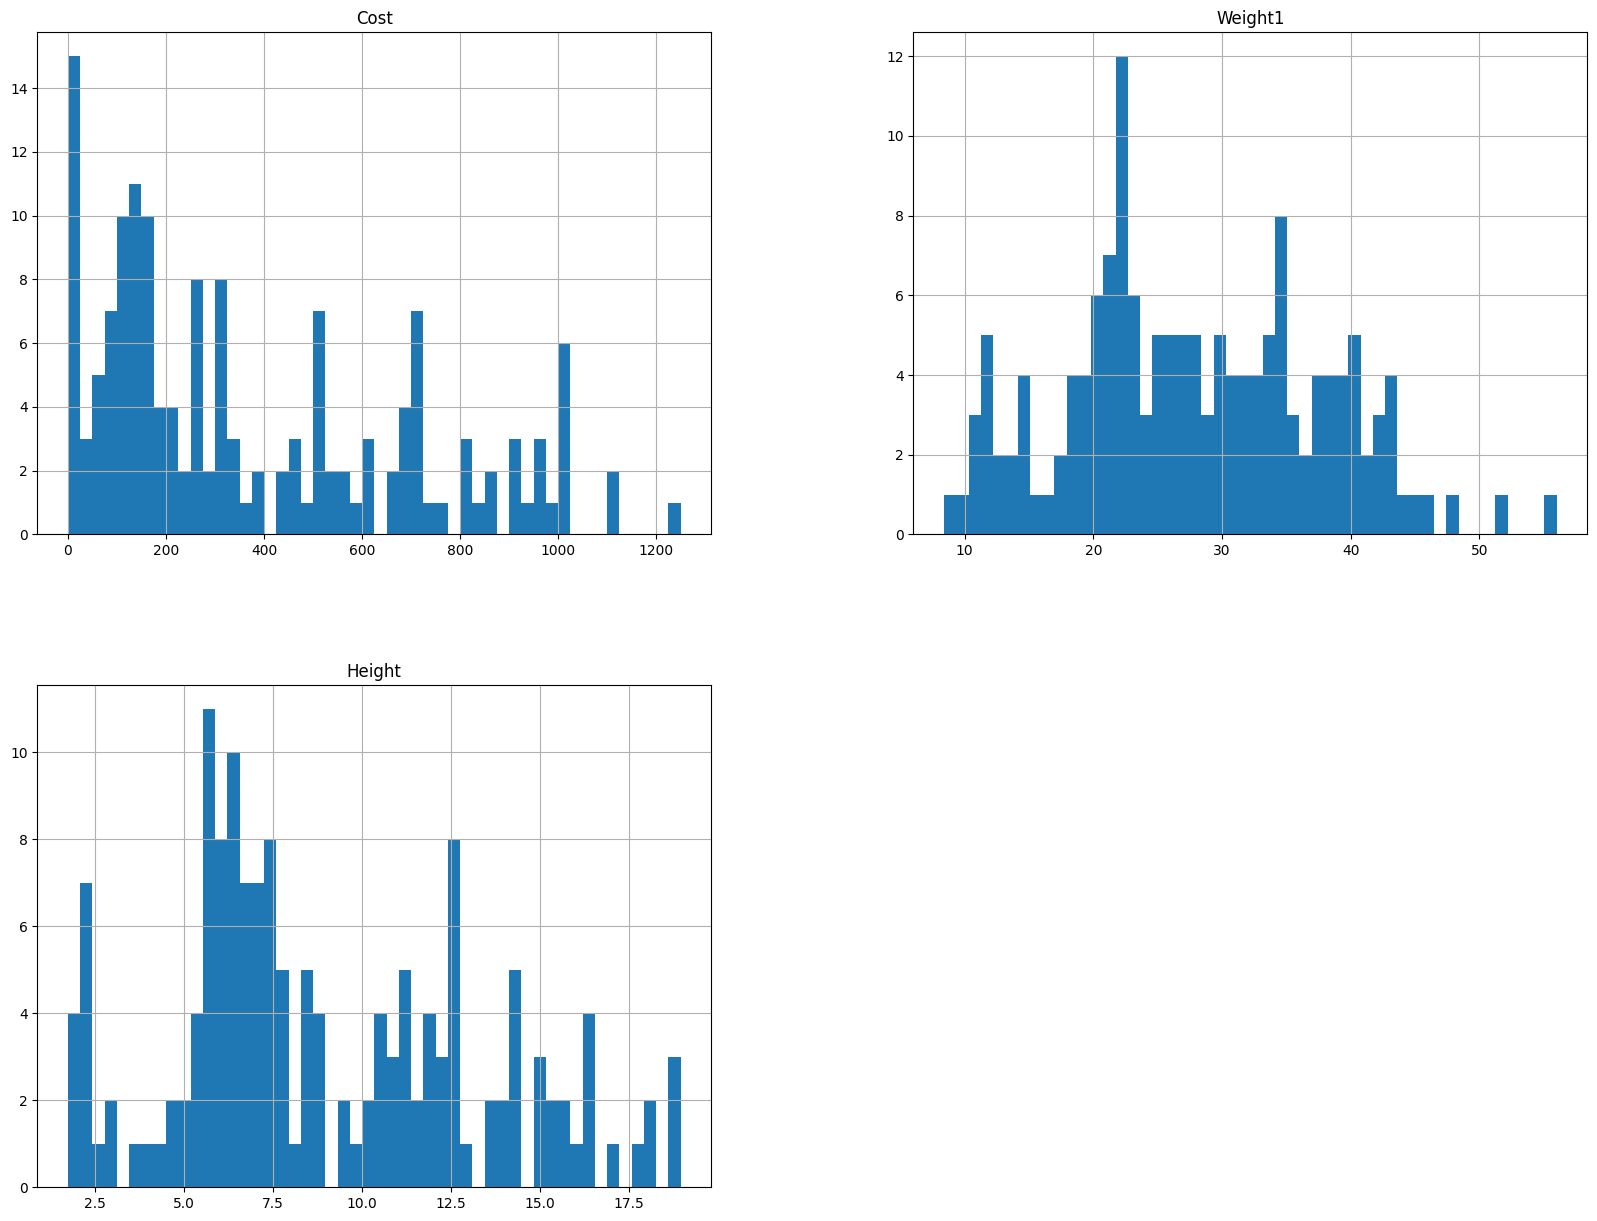

In [49]:
# Plot histograms
data.hist(bins=50, figsize=(20,15))
plt.show()

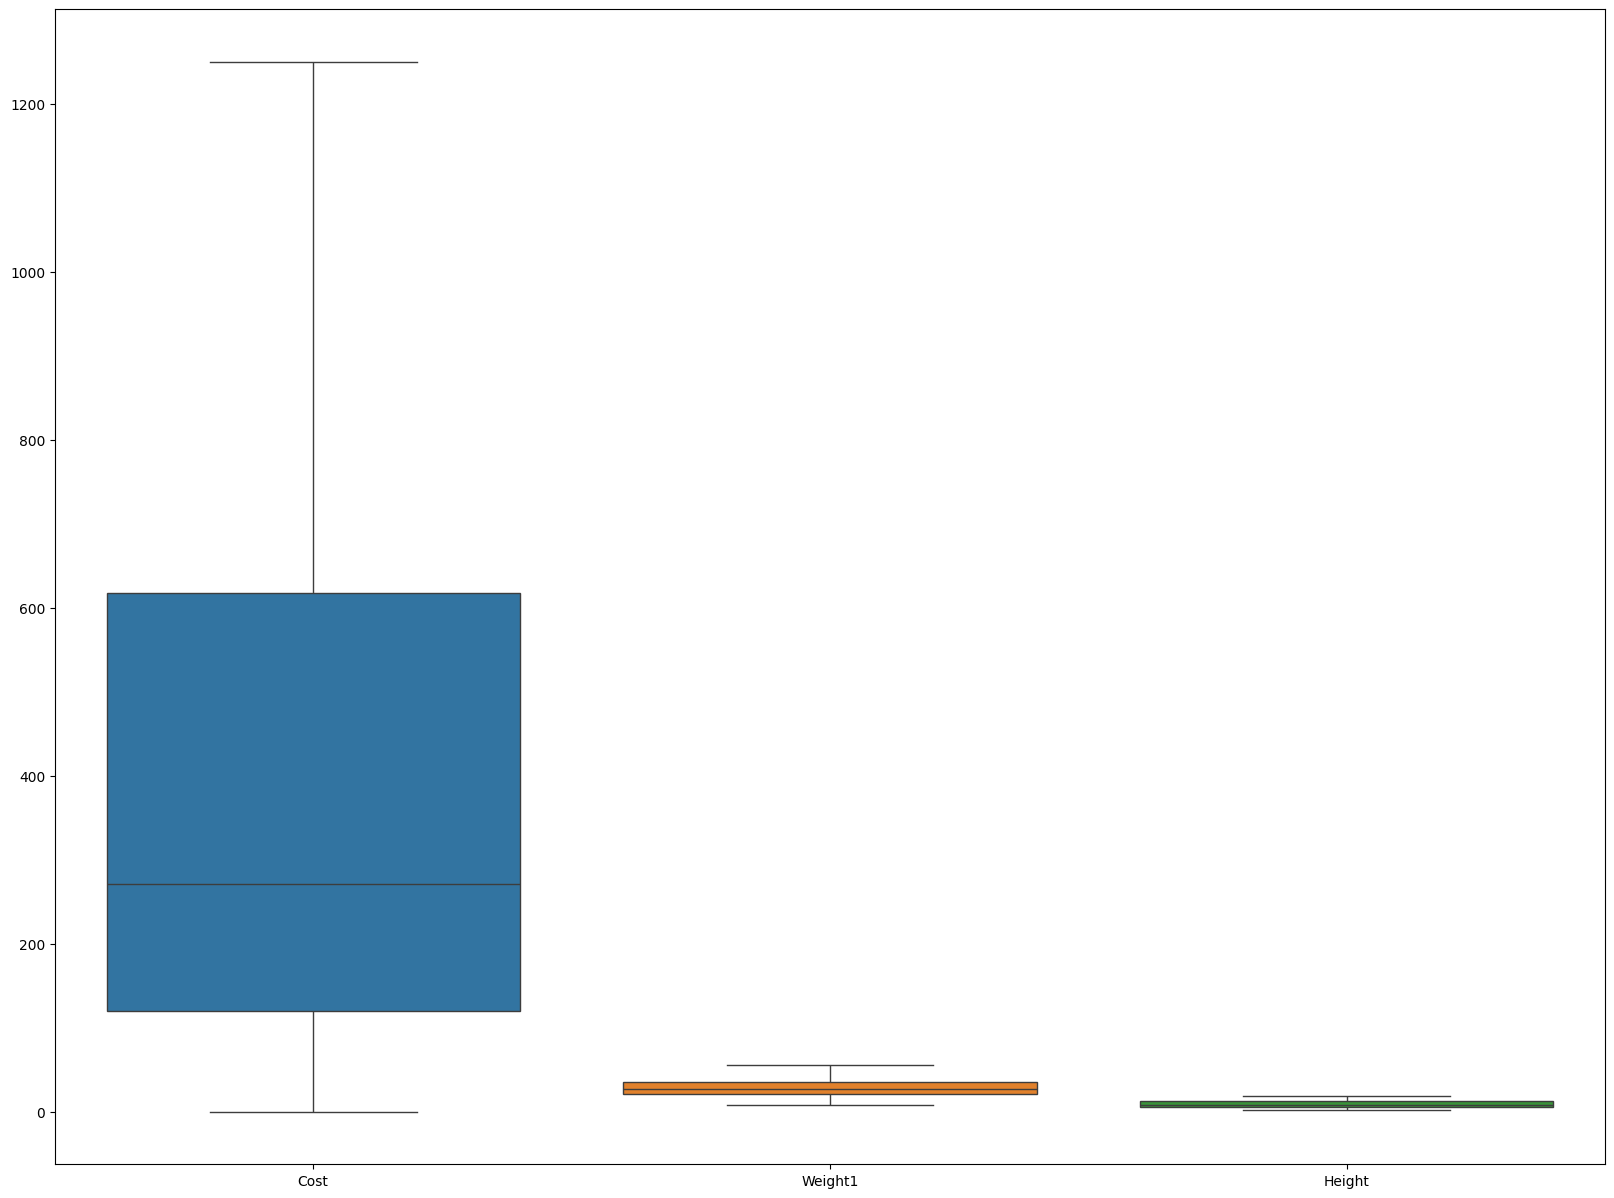

In [50]:
# Plot box plots
plt.figure(figsize=(20,15))
sns.boxplot(data=data)
plt.show()

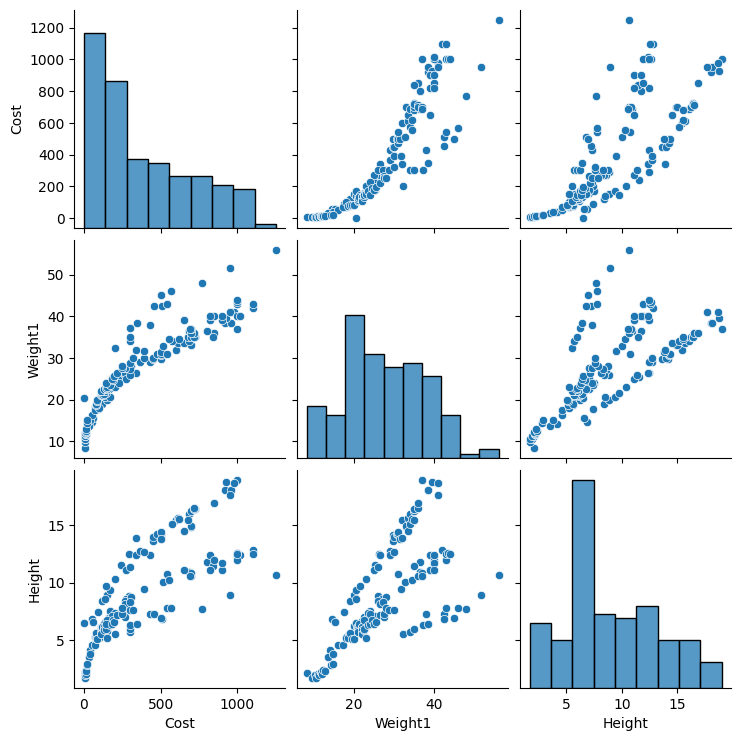

In [51]:
# Plot pair plots
sns.pairplot(data)
plt.show()

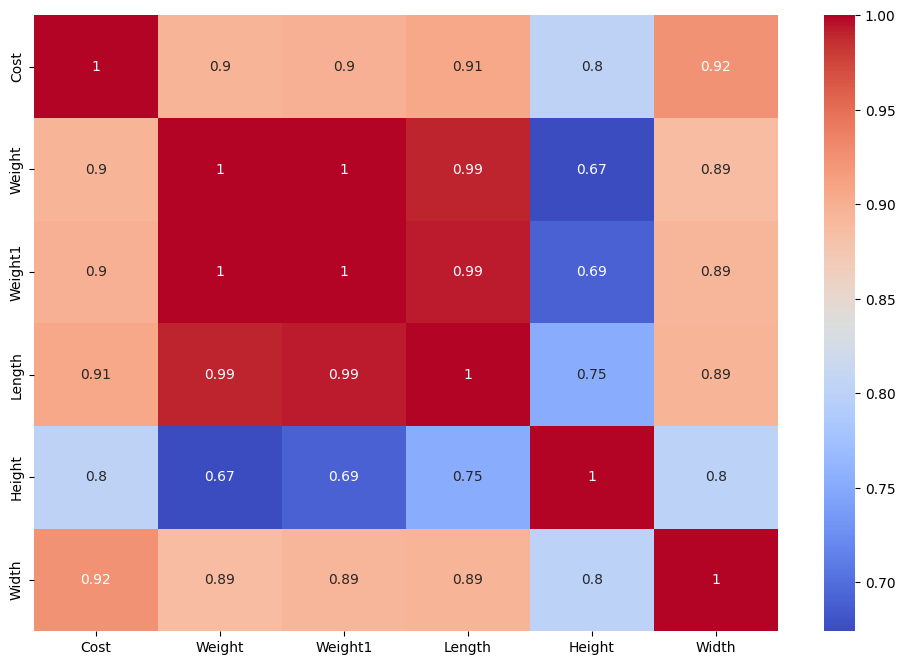

In [52]:
# Replace '#' with NaN in all columns
data = data.replace('#', np.nan)

# Convert all columns to numeric, coercing errors to NaN
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with any NaN values
data = data.dropna()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

## Prepare data for model building

In [53]:
X = data.drop('Cost', axis=1)
y = data['Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Build and evaluate models

In [54]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
mse_lin = mean_squared_error(y_test, y_pred_lin)

# SGD Regressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_reg.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_reg.predict(X_test_scaled)
r2_sgd = r2_score(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mean_squared_error(y_test, y_pred_sgd))
mse_sgd = mean_squared_error(y_test, y_pred_sgd)

# Gradient Descent Regressor
grad_reg = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01)
grad_reg.fit(X_train_scaled, y_train)
y_pred_grad = grad_reg.predict(X_test_scaled)
r2_grad = r2_score(y_test, y_pred_grad)
rmse_grad = np.sqrt(mean_squared_error(y_test, y_pred_grad))
mse_grad = mean_squared_error(y_test, y_pred_grad)

# Mini Batch Gradient Descent
mini_batch_reg = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01)
mini_batch_reg.fit(X_train_scaled, y_train)
y_pred_mini_batch = mini_batch_reg.predict(X_test_scaled)
r2_mini_batch = r2_score(y_test, y_pred_mini_batch)
rmse_mini_batch = np.sqrt(mean_squared_error(y_test, y_pred_mini_batch))
mse_mini_batch = mean_squared_error(y_test, y_pred_mini_batch)

# MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)
y_pred_kmeans = kmeans.predict(X_test_scaled)


print("Linear Regression: R2 =", r2_lin, ", RMSE =", rmse_lin, ", MSE =", mse_lin)
print("SGD Regressor: R2 =", r2_sgd, ", RMSE =", rmse_sgd, ", MSE =", mse_sgd)
print("Gradient Descent Regressor: R2 =", r2_grad, ", RMSE =", rmse_grad, ", MSE =", mse_grad)
print("Mini Batch Gradient Descent: R2 =", r2_mini_batch, ", RMSE =", rmse_mini_batch, ", MSE =", mse_mini_batch)
print("MiniBatchKMeans: Predicted Clusters =", y_pred_kmeans)


Linear Regression: R2 = 0.9051624131749928 , RMSE = 110.3400622944197 , MSE = 12174.929347136418
SGD Regressor: R2 = 0.8870523016678581 , RMSE = 120.41529946824798 , MSE = 14499.844346027841
Gradient Descent Regressor: R2 = 0.8842458633187062 , RMSE = 121.9021141341416 , MSE = 14860.125430373284
Mini Batch Gradient Descent: R2 = 0.8875451675780421 , RMSE = 120.152286219441 , MSE = 14436.571883758472
MiniBatchKMeans: Predicted Clusters = [1 2 2 1 1 2 1 1 1 1 2 2 1 2 2 1 2 1 2 0 2 0 2 0 0 1 2 1 1 2]


## Compare results

The results of the models are compared based on R squared, RMSE, and MSE values. The model with the highest R squared and lowest RMSE and MSE values is considered the best model for predicting the cost of luggage bags.

In [55]:
import pandas as pd

# Create a dictionary to store the model results
model_results = {
    'Model': ['Linear Regression', 'SGD Regressor', 'Gradient Descent Regressor',
              'Mini Batch Gradient Descent'],
    'R-squared': [r2_lin, r2_sgd, r2_grad, r2_mini_batch],
    'RMSE': [rmse_lin, rmse_sgd, rmse_grad, rmse_mini_batch],
    'MSE': [mse_lin, mse_sgd, mse_grad, mse_mini_batch]
}

# Create a Pandas DataFrame
results_df = pd.DataFrame(model_results)

# Display the table
print(results_df)

# Define a function to highlight the best values
def highlight_best(s):
    '''
    Highlights the maximum in a Series green.
    '''
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

def highlight_min(s):
    '''
    Highlights the minimum in a Series green.
    '''
    is_min = s == s.min()
    return ['background-color: lightgreen' if v else '' for v in is_min]


# Apply styling to the DataFrame
styled_df = results_df.style.apply(highlight_best, subset=['R-squared']) \
                           .apply(highlight_min, subset=['RMSE', 'MSE'])

# Display the styled table
display(styled_df)

                         Model  R-squared        RMSE           MSE
0            Linear Regression   0.905162  110.340062  12174.929347
1                SGD Regressor   0.887052  120.415299  14499.844346
2   Gradient Descent Regressor   0.884246  121.902114  14860.125430
3  Mini Batch Gradient Descent   0.887545  120.152286  14436.571884


,Model,R-squared,RMSE,MSE
0,Linear Regression,0.905162,110.340062,12174.929347
1,SGD Regressor,0.887052,120.415299,14499.844346
2,Gradient Descent Regressor,0.884246,121.902114,14860.125430
3,Mini Batch Gradient Descent,0.887545,120.152286,14436.571884
